In [6]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
Random.seed!(123)
include("src/QuantumResource1D.jl")
include("src/HL_module.jl")
include("src/basic_MPS_utils.jl")

generate_ZZ_term_mpo (generic function with 1 method)

In [7]:
N = 5
sites = siteinds("S=1/2", N)
X_string_mpo = generate_X_string_mpo(sites)
O_string_mpo = generate_O_string_mpo(sites)
ZZ_term_mpo = generate_ZZ_term_mpo(sites)
qr = QR1D.QuantumResource1D(N, sites, X_string_mpo, O_string_mpo, ZZ_term_mpo)
GHZ_wf, params_GHZ, name_GHZ = QR1D.generate_GHZ_state(qr)
cluster_wf, params_cluster, name_cluster = QR1D.generate_cluster_state(qr)

g_values = range(-1.0, 1.0, 30)
all_params, all_costs, all_qr = [], [], []
all_X_exp, all_O_exp, all_ZZ_exp = [], [], []
fidelity_ghz_vals, fidelity_cluster_vals = [], []
for g in g_values
    println("\n=== g = $g ===")

    qr_g = QR1D.QuantumResource1D(N, sites, X_string_mpo, O_string_mpo, ZZ_term_mpo)
    QR1D.AddQR(qr_g, GHZ_wf, params_GHZ, name_GHZ)
    QR1D.AddQR(qr_g, cluster_wf, params_cluster, name_cluster);
    
    θ_g, cost_g = QR1D.optimize_circuit_QR(qr_g, g)
    psi_g = QR1D.apply_ladder_circuit(qr_g, θ_g)
    X_expval, O_expval, ZZ_term_ev = QR1D.aux_exp_vals(qr_g, psi_g)

    push!(all_params, θ_g)
    push!(all_costs, cost_g)
    push!(all_qr, qr_g)
    push!(all_X_exp, X_expval)
    push!(all_O_exp, O_expval)
    push!(all_ZZ_exp, ZZ_term_ev)
    push!(fidelity_ghz_vals, abs2(inner(psi_g, GHZ_wf)))
    push!(fidelity_cluster_vals, abs2(inner(psi_g, cluster_wf)))
end


all_params_mat = hcat(all_params...)
writedlm("DATA/all_params_mat.txt", all_params_mat)
writedlm("DATA/g_values.txt", collect(g_values))
writedlm("DATA/fidelity_ghz_vals.txt", fidelity_ghz_vals)
writedlm("DATA/fidelity_cluster_vals.txt", fidelity_cluster_vals)
writedlm("DATA/X_exp.txt", all_X_exp)
writedlm("DATA/O_exp.txt", all_O_exp)
writedlm("DATA/ZZ_exp.txt", all_ZZ_exp)
writedlm("DATA/cost_values.txt", all_costs)

Fidelity wrt to GHZ = 1.0
Fidelity wrt to cluster state = 1.0

=== g = -1.0 ===
Optimizing for g = -1.0...
Optimizing for g = -1.0...

=== g = -0.9310344827586207 ===
Optimizing for g = -0.9310344827586207...
Optimizing for g = -0.9310344827586207...

=== g = -0.8620689655172413 ===
Optimizing for g = -0.8620689655172413...
Optimizing for g = -0.8620689655172413...

=== g = -0.7931034482758621 ===
Optimizing for g = -0.7931034482758621...
Optimizing for g = -0.7931034482758621...

=== g = -0.7241379310344828 ===
Optimizing for g = -0.7241379310344828...
Optimizing for g = -0.7241379310344828...

=== g = -0.6551724137931034 ===
Optimizing for g = -0.6551724137931034...
Optimizing for g = -0.6551724137931034...

=== g = -0.5862068965517241 ===
Optimizing for g = -0.5862068965517241...
Optimizing for g = -0.5862068965517241...

=== g = -0.5172413793103449 ===
Optimizing for g = -0.5172413793103449...
Optimizing for g = -0.5172413793103449...

=== g = -0.4482758620689655 ===
Optimizing for

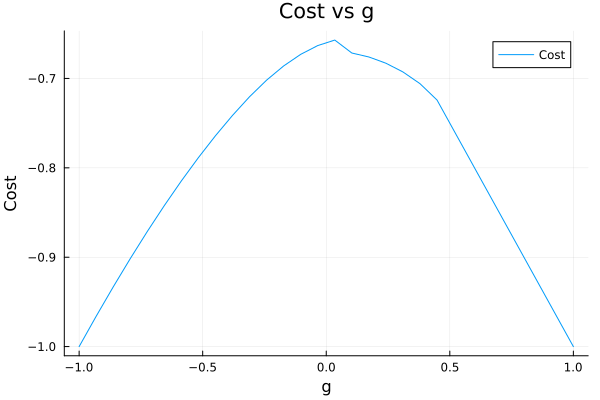

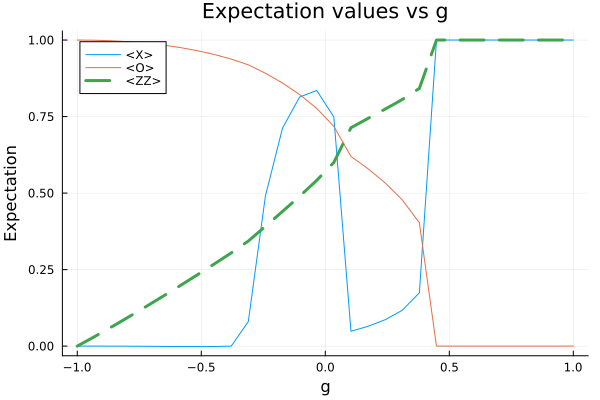

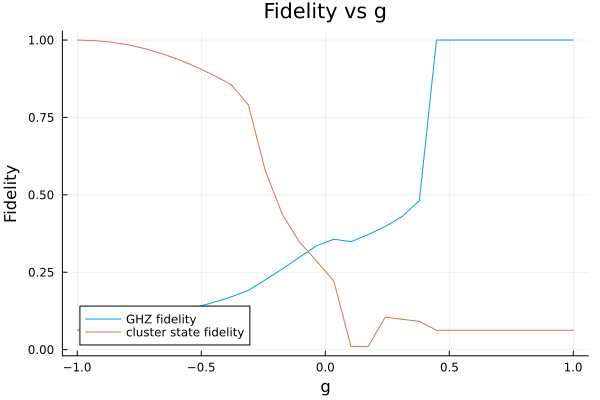

fidelity_ghz_vals = Any[0.062499999843341515, 0.07044641191010453, 0.07922460969290868, 0.0888768352846142, 0.09945826648692674, 0.11104606837344774, 0.12374829768691266, 0.13771313716466901, 0.15314061928833556, 0.1703008890222863, 0.19139674501025025, 0.22553151256545922, 0.26124378305066387, 0.2986602172223416, 0.33583081741778725, 0.3566612428463165, 0.34859975473722576, 0.3714748212386473, 0.3976461403794723, 0.4305556174023044, 0.4811927268695882, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996]
fidelity_cluster_vals = Any[0.9999999999999994, 0.998314222070778, 0.9930908070763755, 0.9841696981990575, 0.9715079997838215, 0.9551627508274356, 0.9352622596449848, 0.9119753247520965, 0.8854852168220859, 0.8559702106929257, 0.7907593226395194, 0.5765386166279712, 0.4359228880315067, 0.3467024893198606, 0.2855603787088613, 0.22125739784209292, 0.010126739974

30-element Vector{Any}:
 0.9999999999999994
 0.998314222070778
 0.9930908070763755
 0.9841696981990575
 0.9715079997838215
 0.9551627508274356
 0.9352622596449848
 0.9119753247520965
 0.8854852168220859
 0.8559702106929257
 ⋮
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996
 0.06249999999999996

In [ ]:
p1 = plot(g_values, all_costs, label="Cost", title="Cost vs g", xlabel="g", ylabel="Cost");
p2 = plot(g_values, all_X_exp, label="<X>", title="Expectation values vs g", xlabel="g", ylabel="Expectation",linewidth=1);
plot!(p2, g_values, all_O_exp, label="<O>",linewidth=1);
plot!(p2, g_values, all_ZZ_exp / (N - 1), label="<ZZ>",linestyle=:dash,linewidth=3);

p3 = plot(g_values, fidelity_ghz_vals, label="GHZ fidelity", title="Fidelity vs g", xlabel="g", ylabel="Fidelity");
plot!(p3, g_values, fidelity_cluster_vals, label="cluster state fidelity");

display(p1)
display(p2)
display(p3)
